<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Dekomposisi_LU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sympy import symbols, Eq, solve

# Mendefinisikan variabel
x = symbols('x')

# Membuat persamaan
persamaan = Eq(x + 7, 0)

# Menyelesaikan persamaan terhadap x
solusi = solve(persamaan, x)
solusi

[-7]

In [ ]:
from sympy import symbols, Eq, solve

# Mendefinisikan variabel
x, a = symbols('x a')

# Membuat persamaan
persamaan = Eq(3*x + a, 0)

# Menyelesaikan persamaan terhadap x
solusi = solve(persamaan, x)

print(solusi)

[-a/3]


In [ ]:
from sympy import symbols, Eq, solve

# Mendefinisikan variabel
x = symbols('x')

# Membuat persamaan
persamaan = Eq(x**2 + x - 6, 0)

# Menyelesaikan persamaan kuadrat
solusi = solve(persamaan, x)
print(solusi)

[-3, 2]


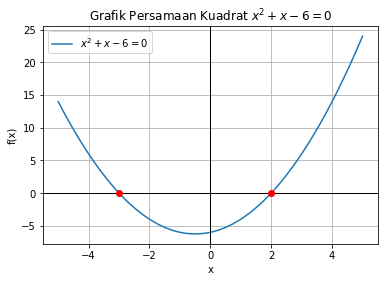

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan fungsi kuadrat
def f(x):
    return x**2 + x - 6

# Rentang nilai x
x = np.linspace(-5, 5, 400)

# Hitung nilai y untuk setiap x
y = f(x)

# Membuat grafik
plt.plot(x, y, label=r'$x^2 + x - 6 = 0$')

# Tambahkan garis sumbu x dan y
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)

# Tandai akar persamaan
plt.scatter([2, -3], [0, 0], color='red', zorder=5) # Akar x = 2 dan x = -3

# Tambahkan label dan judul
plt.title('Grafik Persamaan Kuadrat $x^2 + x - 6 = 0$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Tampilkan grafik
plt.grid(True)
plt.show()

In [ ]:
from sympy import symbols, Eq, solve

# Mendefinisikan variabel
x = symbols('x')

# Membuat persamaan
persamaan = Eq(x**3 - 8*x**2 + x + 42, 0)

# Menyelesaikan persamaan kubik
solusi = solve(persamaan, x)
print(solusi)

[-2, 3, 7]


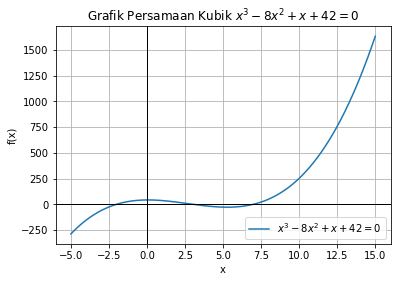

In [ ]:
# Definisikan fungsi kubik
def f(x):
    return x**3 - 8*x**2 + x + 42

# Rentang nilai x
x = np.linspace(-5, 15, 400)

# Hitung nilai y untuk setiap x
y = f(x)

# Membuat grafik
plt.plot(x, y, label=r'$x^3 - 8x^2 + x + 42 = 0$')

# Tambahkan garis sumbu x dan y
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)

# Tambahkan label dan judul
plt.title('Grafik Persamaan Kubik $x^3 - 8x^2 + x + 42 = 0$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Tampilkan grafik
plt.grid(True)
plt.show()

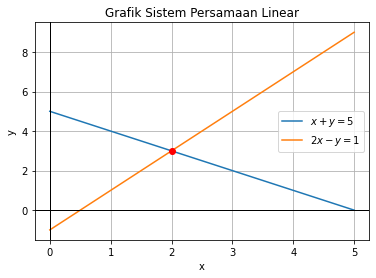

In [ ]:
# Definisikan fungsi dari kedua persamaan
def f1(x):
    return 5 - x

def f2(x):
    return 2*x - 1

# Rentang nilai x
x = np.linspace(0, 5, 400)

# Hitung nilai y untuk setiap x berdasarkan kedua fungsi
y1 = f1(x)
y2 = f2(x)

# Membuat grafik
plt.plot(x, y1, label=r'$x + y = 5$')
plt.plot(x, y2, label=r'$2x - y = 1$')

# Tandai titik potong
plt.scatter(2, 3, color='red', zorder=5)  # Titik potong (2, 3)

# Tambahkan garis sumbu x dan y
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)

# Tambahkan label dan judul
plt.title('Grafik Sistem Persamaan Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Tampilkan grafik
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from scipy.linalg import lu

# Definisikan matriks A
A = np.array([[2, -1, -2],
              [-4, 6, 3],
              [-4, -2, 8]])

# Lakukan dekomposisi LU
P, L, U = lu(A)

# Cetak hasil
print("Matriks P:\n", P)
print("Matriks L:\n", L)
print("Matriks U:\n", U)

Matriks P:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Matriks L:
 [[ 1.    0.    0.  ]
 [ 1.    1.    0.  ]
 [-0.5  -0.25  1.  ]]
Matriks U:
 [[-4.    6.    3.  ]
 [ 0.   -8.    5.  ]
 [ 0.    0.    0.75]]


In [ ]:
def lu_decomposition(A):
    n = len(A)
    L = [[0.0 for _ in range(n)] for _ in range(n)]
    U = [[0.0 for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for k in range(i, n):
            sum_u = sum(L[i][j] * U[j][k] for j in range(i))
            U[i][k] = A[i][k] - sum_u

        for k in range(i, n):
            if i == k:
                L[i][i] = 1.0
            else:
                sum_l = sum(L[k][j] * U[j][i] for j in range(i))
                L[k][i] = (A[k][i] - sum_l) / U[i][i]

    return L, U
def forward_substitution(L, b):
    n = len(L)
    y = [0.0] * n
    for i in range(n):
        sum_ly = sum(L[i][j] * y[j] for j in range(i))
        y[i] = (b[i] - sum_ly) / L[i][i]
    return y

def backward_substitution(U, y):
    n = len(U)
    x = [0.0] * n
    for i in range(n-1, -1, -1):
        sum_ux = sum(U[i][j] * x[j] for j in range(i+1, n))
        x[i] = (y[i] - sum_ux) / U[i][i]
    return x
A = [[2, -1, -2],
     [-4, 6, 3],
     [-4, -2, 8]]
b = [-2, 9, -9]

L, U = lu_decomposition(A)
y = forward_substitution(L, b)
x = backward_substitution(U, y)

print("Solusi x adalah:", x)

Solusi x adalah: [-3.375, 0.5833333333333334, -2.6666666666666665]


In [ ]:
from sympy import symbols, Eq, solve

# Mendefinisikan variabel
x, a = symbols('x a')

equition=[
    Eq(4*x + 2, 3),
    Eq(7*x + 3, -12),
    Eq(-1*x - 7, 0),
    Eq(5*x + 8, 0),
    Eq(3*x + a, 0),
    Eq(a + 2*x, 0),
]

# Menyelesaikan persamaan terhadap x
solusi = [solve(eq) for eq in equition]
solusi

[[1/4], [-15/7], [-7], [-8/5], [{a: -3*x}], [{a: -2*x}]]

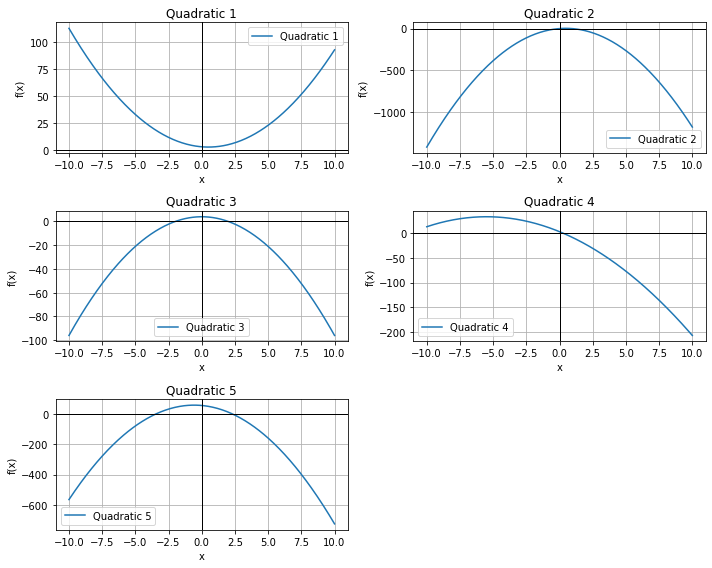

[[1/2 - sqrt(11)*I/2, 1/2 + sqrt(11)*I/2],
 [-1/13, 1],
 [-2, 2],
 [-11/2 + sqrt(133)/2, -sqrt(133)/2 - 11/2],
 [-4/7 + 2*sqrt(102)/7, -2*sqrt(102)/7 - 4/7]]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, lambdify

quad_equition=[
    Eq(x**2 -x + 3, 0),
    Eq(-13*x**2 + 12*x +1, 0),
    Eq(4 - x**2, 0),
    Eq(3 - x**2 - 11*x, 0),
    Eq(56 - 8*x - 7*x**2, 0),
]

quad_solusi = [solve(eq, x) for eq in quad_equition]

def plot_quad(eq, title):
    f = lambdify(x, eq.lhs, "numpy")
    x_vals = np.linspace(-10,10,400)
    y_vals=f(x_vals)

    plt.plot(x_vals, y_vals, label=title)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid(True)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

plt.figure(figsize=(10,8))
for i, eq in enumerate(quad_equition):
    plt.subplot(3,2,i+1)
    plot_quad(eq, f"Quadratic {i+1}")

plt.tight_layout()
plt.show()

quad_solusi

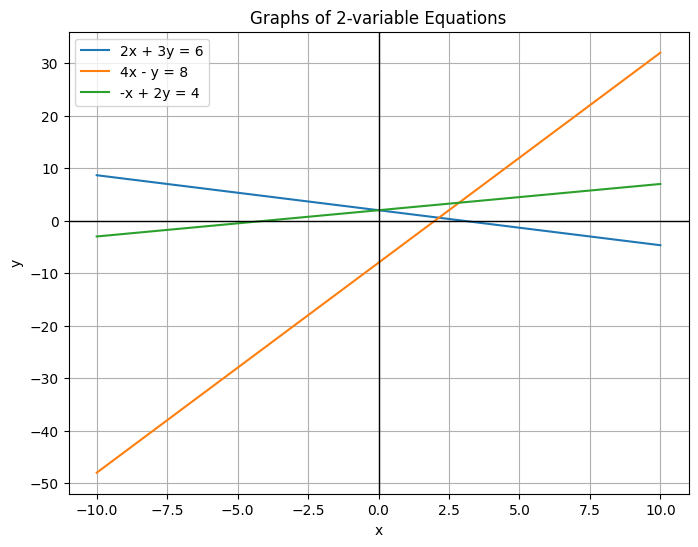

([2 - 2*x/3], [4*x - 8], [x/2 + 2])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, lambdify

# Define variables
x, y = symbols('x y')

# Define three equations with two variables
eq1 = Eq(2*x + 3*y, 6)
eq2 = Eq(4*x - y, 8)
eq3 = Eq(-x + 2*y, 4)

# Solve the system of equations
sol_eq1 = solve(eq1, y)
sol_eq2 = solve(eq2, y)
sol_eq3 = solve(eq3, y)

# Create a range of x values for plotting
x_vals = np.linspace(-10, 10, 400)

# Convert solutions into lambdified functions for plotting
f_eq1 = lambdify(x, sol_eq1[0], "numpy")
f_eq2 = lambdify(x, sol_eq2[0], "numpy")
f_eq3 = lambdify(x, sol_eq3[0], "numpy")

# Calculate y values for each equation
y_vals_eq1 = f_eq1(x_vals)
y_vals_eq2 = f_eq2(x_vals)
y_vals_eq3 = f_eq3(x_vals)

# Plotting the equations
plt.figure(figsize=(8, 6))

plt.plot(x_vals, y_vals_eq1, label='2x + 3y = 6')
plt.plot(x_vals, y_vals_eq2, label='4x - y = 8')
plt.plot(x_vals, y_vals_eq3, label='-x + 2y = 4')

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)

plt.legend()
plt.title('Graphs of 2-variable Equations')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

(sol_eq1, sol_eq2, sol_eq3)

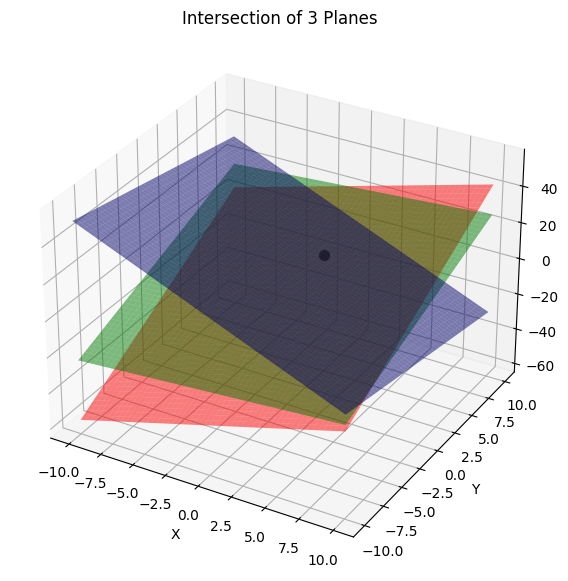

'x = 3/5, y = 4, z = 31/5'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
from mpl_toolkits.mplot3d import Axes3D

# Define variables
x, y, z = symbols('x y z')

# Define the system of equations
eq1 = Eq(2*x + 3*y - z, 7)
eq2 = Eq(x - 4*y + 2*z, -3)
eq3 = Eq(3*x + y + z, 12)

# Solve the system of equations
solutions = solve([eq1, eq2, eq3], (x, y, z))

# Extract solutions for x, y, and z
x_sol = solutions[x]
y_sol = solutions[y]
z_sol = solutions[z]

# Display the solution
solution_display = f"x = {x_sol}, y = {y_sol}, z = {z_sol}"

# Plotting the 3D graph of the system of equations
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Define the three planes
Z1 = 2*X + 3*Y - 7  # from equation 1: 2x + 3y - z = 7
Z2 = (X + 3 + 4*Y)/2  # from equation 2: x - 4y + 2z = -3
Z3 = 12 - 3*X - Y  # from equation 3: 3x + y + z = 12

# Plot the graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each plane
ax.plot_surface(X, Y, Z1, color='r', alpha=0.5, label='2x + 3y - z = 7')
ax.plot_surface(X, Y, Z2, color='g', alpha=0.5, label='x - 4y + 2z = -3')
ax.plot_surface(X, Y, Z3, color='b', alpha=0.5, label='3x + y + z = 12')

# Mark the solution point
ax.scatter(float(x_sol), float(y_sol), float(z_sol), color='k', s=50)

# Labels and titles
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Intersection of 3 Planes')

plt.show()

solution_display

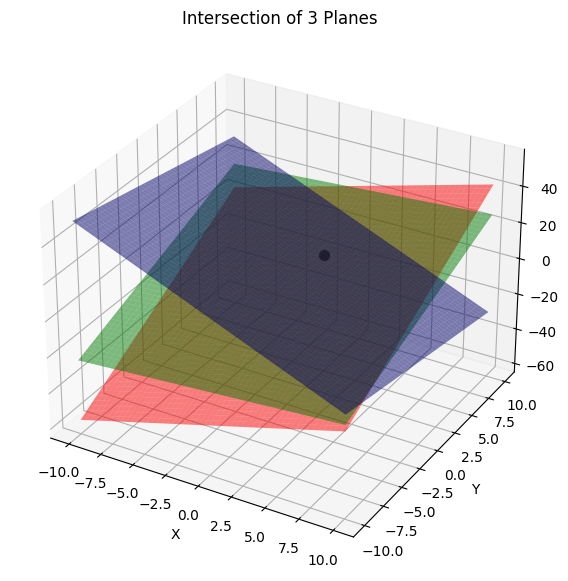

'x = 0.5999999999999984, y = 4.000000000000002, z = 6.200000000000003'

In [4]:
from scipy.linalg import lu

# Define the coefficients matrix A and the constants vector b
A = np.array([[2, 3, -1],
              [1, -4, 2],
              [3, 1, 1]])
b = np.array([7, -3, 12])

# Perform LU decomposition
P, L, U = lu(A)

# Forward substitution to solve Ly = Pb
y = np.linalg.solve(L, np.dot(P, b))

# Backward substitution to solve Ux = y
x = np.linalg.solve(U, y)

# Display the solution
x_sol, y_sol, z_sol = x[0], x[1], x[2]
solution_display = f"x = {x_sol}, y = {y_sol}, z = {z_sol}"

# Plotting the 3D graph of the system of equations
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Define the three planes
Z1 = 2*X + 3*Y - 7  # from equation 1: 2x + 3y - z = 7
Z2 = (X + 3 + 4*Y)/2  # from equation 2: x - 4y + 2z = -3
Z3 = 12 - 3*X - Y  # from equation 3: 3x + y + z = 12

# Plot the graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each plane
ax.plot_surface(X, Y, Z1, color='r', alpha=0.5, label='2x + 3y - z = 7')
ax.plot_surface(X, Y, Z2, color='g', alpha=0.5, label='x - 4y + 2z = -3')
ax.plot_surface(X, Y, Z3, color='b', alpha=0.5, label='3x + y + z = 12')

# Mark the solution point
ax.scatter(float(x_sol), float(y_sol), float(z_sol), color='k', s=50)

# Labels and titles
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Intersection of 3 Planes')

plt.show()

solution_display